In [4]:
import numpy as np
from scipy.io import loadmat
from muniverse.algorithms.decomposition_methods import upper_bound, basic_cBSS
from muniverse.algorithms.decomposition_routines import *
import matplotlib.pyplot as plt
from muniverse.evaluation.evaluate import *
from pathlib import Path
import time

In [5]:
datapath = str(Path.home()) + '/Documents/muniverse-data/'

muap_data = loadmat(datapath + 'muap.mat', struct_as_record=False, squeeze_me=True)
emg_data  = loadmat(datapath + 'emg_data.mat', struct_as_record=False, squeeze_me=True)
gt_spikes  = loadmat(datapath + 'spikes.mat', struct_as_record=False, squeeze_me=True)

fsamp = 2048
MUAPs = muap_data['muaps']
SIG = emg_data['data']

sdict = {}
for i in np.arange(148): 
    sdict[i] = gt_spikes['spike_times'][i]
gt_spikes = spike_dict_to_long_df(sdict, fsamp=10000)
gt_spikes = gt_spikes.rename(columns={'source_id': 'unit_id'})
gt_spikes['spike_time'] = gt_spikes['spike_time']
gt_spikes['timestamp'] = (gt_spikes['spike_time']*fsamp).astype(int)


In [6]:
UB = upper_bound(sil_th = 0.85, ext_fact = 16)

start = time.time()
sources2, spikes2, sil2, mu_filters2 = UB.decompose(SIG, MUAPs, fsamp)
end = time.time()
print(f"Runtime: {end - start:.6f} seconds")

ub_spikes = spike_dict_to_long_df(spikes2, fsamp=fsamp)
ub_spikes = ub_spikes.rename(columns={'source_id': 'unit_id'})
ub_spikes['spike_time'] = ub_spikes['spike_time']
ub_spikes['timestamp'] = (ub_spikes['spike_time']*fsamp).astype(int)

Runtime: 9.861857 seconds


In [7]:
cBSS = basic_cBSS(sil_th = 0.85, ext_fact = 16)

start = time.time()
sources, spikes, sil, mu_filters = cBSS.decompose(SIG, fsamp)
end = time.time()
print(f"Runtime: {end - start:.6f} seconds")

cbss_spikes = spike_dict_to_long_df(spikes, fsamp=fsamp)
cbss_spikes = cbss_spikes.rename(columns={'source_id': 'unit_id'})
cbss_spikes['spike_time'] = cbss_spikes['spike_time'] 
cbss_spikes['timestamp'] = (cbss_spikes['spike_time']*fsamp).astype(int)

Runtime: 652.874576 seconds


In [8]:
df1 = evaluate_spike_matches(cbss_spikes, gt_spikes, t_start = 0, t_end = 40)
df2 = evaluate_spike_matches(ub_spikes, gt_spikes, t_start = 0, t_end = 40)

print(df1)
print(df2)

   unit_id  unit_id_ref  delay_seconds   TP   FN   FP
0        0          107        -0.0035  271   19    6
1        1          124        -0.0011  113  603    8
2        2           49        -0.0006  568   24   49
3        3          144        -0.0629    2  627    0
4        4           76         0.0006  387  295   98
5        5           98        -0.0048  251   67  105
6        6          101        -0.0013  272   49   67
7        7          104         0.0008  264   10   39
    unit_id  unit_id_ref  delay_seconds   TP   FN   FP
0         0            5        -0.0009  660   89   82
1         1           31        -0.0024  472   35  199
2         2          144        -0.0594    2  590    0
3         3           49        -0.0016  558    9   59
4         4           81        -0.0031  368  289   92
5         5           98        -0.0009  289   10   67
6         6          101        -0.0030  295    8   44
7         7          104         0.0001  273   14   30
8         8        

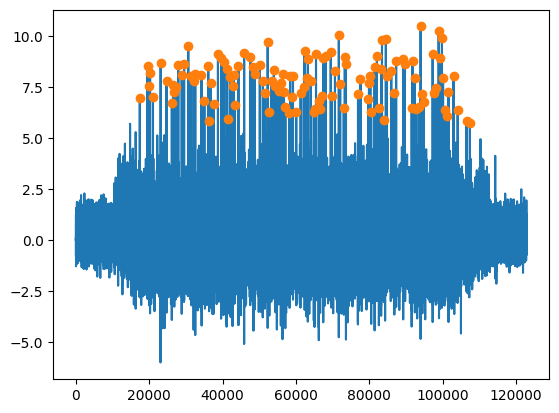

In [ ]:
idx = 8
plt.figure(11)
plt.plot(sources2[idx,:])
plt.plot(spikes2[idx],sources2[idx,spikes2[idx]],'o')
plt.show()